In [1]:
import os
import warnings

import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.utils.data as DT
import numpy as np
from torch.utils.data import random_split
import torch.nn as nn
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
warnings.filterwarnings('ignore')

## 数据导入

In [341]:
# 输入特征（构造数据）
X = torch.tensor([[1, 1, 1, 1, -1],
    [-1, -1, -1, 1, -1],
    [-1, 1, -1, -1, -1],
    [1, -1, -1, 1, -1],
    [-1, 1, 1, 1, -1],
    [1, -1, 1, -1, -1],
    [1, 1, -1, -1, -1],
    [-1, -1, 1, -1, -1],
    [-1, 1, -1, 1, -1],
    [-1, -1, 1, 1, -1],
    [1, -1, -1, -1, -1],
    [-1, 1, 1, -1, -1],
    [1, 1, -1, 1, -1], 
    [1, -1, 1, 1, -1],
    [1, -1, 1, 1, -1],
    [-1, -1, -1, -1, -1],
    [1, 1, 1, -1, -1]], dtype=torch.float32)

# 输入标签
# y = torch.tensor(
#     [0.1,  0.9,  0.9,  0.1,  0.9,  0.1,  0.1,  0.9, 0.1, 0.1, 0.9, 0.1, 0.9, 0.9, 0.9, 0.1, 0.9],
#     )
y = torch.tensor(
    [0,  1,  1,  0,  1,  0,  0,  1, 0, 0, 1, 0, 1, 1, 1, 0, 1],dtype=torch.float32
    )


In [342]:
# 花类别数据
data = pd.read_csv('./iris.data',header=None, names=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class' ])

# 将数据进行类别转化
classlabel = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data['class'] = data['class'].map(classlabel)

dt = data[data['class'].isin([0,1])]   #表显示满足条件：列y中的值包含'6','8'的所有行。
dt  
x = np.array(dt[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']])
y = np.array(dt['class'])
x,y, np.shape(x), np.shape(y)

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [14]:
# Mines vs. Rocks数据集
MR_data = pd.read_csv('./sonar.all-data',header=None, names=list(range(61)))
MR_data.rename(columns={60:'class'}, inplace = True)

# 对岩石进行标签分类
classlabel = {'R':0, 'M':1}
MR_data['class'] = MR_data['class'].map(classlabel)

# 取特征与标签
x = np.array(MR_data.iloc[:,:-1])
y = np.array(MR_data.iloc[:,-1])
x, y


(array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
        [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
        [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
        ...,
        [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
        [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
        [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1

In [129]:
# divorce.csv
D_data = pd.read_csv('./divorce.csv', sep=';')

# 取特征与标签
x = np.array(D_data.iloc[:,:-1])
y = np.array(D_data.iloc[:,-1])
x, y

(array([[2, 2, 4, ..., 3, 2, 1],
        [4, 4, 4, ..., 4, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [1, 1, 0, ..., 3, 0, 0],
        [0, 0, 0, ..., 4, 3, 1],
        [0, 0, 0, ..., 3, 3, 1]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [486]:
# SPECT 心脏数据集
train_data = pd.read_csv('./SPECT.train',header=None, names=list(range(23)))
test_data = pd.read_csv('./SPECT.test',header=None, names=list(range(23)))

X_train = np.array(train_data.iloc[:,1:])
y_train = np.array(train_data.iloc[:,0])
X_test = np.array(test_data.iloc[:,1:])
y_test = np.array(test_data.iloc[:,0])
X_train,y_train,X_test, y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 1],
        [1, 0, 1, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 1, 1],
        [1, 0, 0, ..., 0, 0, 0]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([[1, 0, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    

In [10]:
# SomervilleHappinessSurvey2015.csv   Somerville Happiness Survey Data Set
SPS_data = pd.read_csv('./SomervilleHappinessSurvey2015.csv',encoding='utf-16')
x = np.array(SPS_data.iloc[:,1:])
y = np.array(SPS_data.iloc[:,0])
x,y

(array([[3, 3, 3, 4, 2, 4],
        [3, 2, 3, 5, 4, 3],
        [5, 3, 3, 3, 3, 5],
        [5, 4, 3, 3, 3, 5],
        [5, 4, 3, 3, 3, 5],
        [5, 5, 3, 5, 5, 5],
        [3, 1, 2, 2, 1, 3],
        [5, 4, 4, 4, 4, 5],
        [4, 1, 4, 4, 4, 4],
        [4, 4, 4, 2, 5, 5],
        [3, 2, 3, 3, 2, 3],
        [4, 4, 3, 4, 4, 4],
        [5, 2, 4, 5, 5, 5],
        [4, 2, 4, 5, 4, 3],
        [4, 1, 3, 3, 4, 3],
        [3, 2, 4, 3, 4, 4],
        [5, 3, 4, 5, 4, 5],
        [5, 1, 4, 3, 4, 5],
        [5, 1, 2, 4, 4, 5],
        [4, 2, 4, 4, 4, 4],
        [4, 2, 3, 3, 4, 4],
        [4, 2, 3, 3, 4, 4],
        [4, 3, 5, 5, 5, 4],
        [4, 3, 5, 5, 5, 4],
        [5, 1, 2, 5, 2, 4],
        [4, 3, 3, 3, 3, 4],
        [3, 4, 3, 3, 2, 3],
        [3, 3, 3, 5, 5, 5],
        [3, 3, 1, 3, 3, 4],
        [3, 3, 1, 3, 3, 4],
        [5, 3, 3, 3, 5, 3],
        [5, 3, 3, 3, 5, 3],
        [4, 3, 3, 3, 4, 4],
        [4, 1, 3, 4, 4, 5],
        [3, 2, 4, 4, 4, 5],
        [3, 2, 4, 4,

In [12]:
#  Breast Cancer Coimbra Data Set
BCC_data = pd.read_csv('./dataR2.csv')

# 标签分类
classlabel = {1:0, 2:1}
BCC_data['Classification'] = BCC_data['Classification'].map(classlabel)

# 取特征与标签
x = np.array(BCC_data.iloc[:,:-1])
y = np.array(BCC_data.iloc[:,-1])
# x.mean(axis=0), y


# 特征值归一化
def feature_normalize(data):
    mu = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    return (data - mu)/std

x = feature_normalize(x)

In [13]:
# Raisin_Dataset.xlsx
R_data = pd.read_excel('./Raisin_Dataset.xlsx')
R_data

# 标签分类
classlabel = {'Kecimen':0, 'Besni':1}
R_data['Class'] = R_data['Class'].map(classlabel)

# 取特征与标签
x = np.array(R_data.iloc[:,:-1])
y = np.array(R_data.iloc[:,-1])
# x.mean(axis=0), y


# 特征值归一化
def feature_normalize(data):
    mu = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    return (data - mu)/std

x = feature_normalize(x)

In [57]:
# Abalone Data Set
A_data = pd.read_csv('./abalone.data',header=None, names=list(range(9)))
A_data.rename(columns={0:'class'}, inplace = True)

# 对岩石进行标签分类
classlabel = {'M':0, 'F':1,'I':2}
A_data['class'] = A_data['class'].map(classlabel)


dt = A_data[A_data['class'].isin([0,1])]   #表显示满足条件：列y中的值包含'M','F'的所有行。
dt
# 取特征与标签
x = np.array(dt.iloc[:,1:])
y = np.array(dt.iloc[:,0])
x, y

(array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
        [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
        [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
        ...,
        [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
        [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
        [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]]),
 array([0, 0, 1, ..., 0, 1, 0]))

In [3]:
# magic04.data
magic_data = pd.read_csv('./magic04.data',header=None, names=list(range(11)))
magic_data.rename(columns={10:'class'}, inplace = True)

# 标签分类
classlabel = {'g':0, 'h':1}
magic_data['class'] = magic_data['class'].map(classlabel)

# 取特征与标签
x = np.array(magic_data.iloc[:,:-1])
y = np.array(magic_data.iloc[:,-1])
# x.mean(axis=0), y


# 特征值归一化
def feature_normalize(data):
    mu = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    return (data - mu)/std

x = feature_normalize(x)
x,y

(array([[-0.57722602, -0.33680419, -0.38113037, ..., -0.40584194,
          0.47681587, -1.49786555],
        [-0.51096889, -0.57002666, -0.64859479, ..., -0.49009359,
         -0.81541816,  0.15312459],
        [ 2.56827756,  6.20585836,  2.61578306, ..., -2.18302986,
          1.88922413,  0.84263513],
        ...,
        [ 0.52392318,  1.38177927,  1.31887687, ..., -0.4665087 ,
          0.10163583,  0.83900338],
        [ 1.58775746,  2.98278123,  2.47337518, ..., -3.07720555,
          2.18525981,  2.87032093],
        [ 3.16145936,  1.67999288,  0.81314905, ...,  1.49930076,
          0.96101431,  1.05044239]]),
 array([0, 0, 0, ..., 1, 1, 1]))

In [15]:
# 数据集

class MyDataset(DT.Dataset):
    """
        自定义dataset
        把 dataset 放入 DataLoader
        必须实现__getitem__和__len__方法

    """
    def __init__(self, X, y):
        super(MyDataset, self).__init__()
        self.X = X
        self.y = y
        self.len = len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def __len__(self):
        return self.len
    
# 划分数据集   
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
    
    
# 将数据导入到数据集    
traindata_set = MyDataset(X_train, y_train)
testdata_set = MyDataset(X_test, y_test)
# traindata_set = MyDataset(X, y)
# testdata_set = MyDataset(X, y)

In [16]:
# 将数据集划分为训练数据集和测试数据集

train_loader = DT.DataLoader(
    dataset=traindata_set,      # torch TensorDataset format
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    batch_size=1,
    num_workers=2,              # 多线程来读数据
)
test_loader = DT.DataLoader(
    dataset=testdata_set,      # torch TensorDataset format
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    batch_size=1,
    num_workers=2,              # 多线程来读数据
)


## 参数初始化

In [24]:
# 将权重w,偏置b初始为平均分布(-2.0, 2.0)之间的任意数
def init_weight(m):
    if isinstance(m, nn.Linear):
        nn.init.uniform_(m.weight.data, -1.0, 1.0)
        nn.init.uniform_(m.bias.data, -1.0, 1.0)
        
# 范围越大，权重起伏大，准确率也不稳定

## 模型

In [39]:
# 神经网络

class Net(torch.nn.Module):
    """
        自定义神经网络
        隐藏层，输出层，激活函数
        注意区分分类任务与回归任务
    """
    def __init__(self, n_feature, n_output):
        super(Net, self).__init__()
        self.linear = torch.nn.Linear(n_feature, n_output)   # hidden layer
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        y_hat = self.sigmoid(self.linear(x))      # activation function for hidden layer
        return y_hat.squeeze(-1)

# 模型初始化


net = Net(60, 1)

# 模型参数初始化

net.linear.apply(init_weight)
print(net.linear.weight,  net.linear.bias)

Parameter containing:
tensor([[ 0.9382, -0.9119,  0.3635, -0.3537,  0.8445, -0.0837, -0.8794,  0.8676,
         -0.3218,  0.3301, -0.5013,  0.9861, -0.7237, -0.4613,  0.8303, -0.5786,
          0.4951,  0.6062,  0.5688,  0.3983,  0.5212,  0.4543,  0.0610,  0.2892,
          0.7288,  0.0254, -0.3107, -0.6762, -0.2240,  0.3559, -0.3422, -0.2470,
          0.4477,  0.7823,  0.2768,  0.2299,  0.6924,  0.9053, -0.3045,  0.8995,
          0.8477, -0.2994, -0.7637, -0.7110,  0.2636,  0.2488, -0.6744, -0.4259,
         -0.9315,  0.5883,  0.7620,  0.4727, -0.4068, -0.3832, -0.2172, -0.2114,
          0.5796, -0.2272,  0.4031, -0.2171]], requires_grad=True) Parameter containing:
tensor([-0.8037], requires_grad=True)


## 误差函数

In [40]:
# 熵误差

class Entropyloss(torch.nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, y_hat, y):
#         if y == 0 | (y_hat / y)==0 | ((1 - y_hat) / (1 - y))==0 | (1-y) == 0:
#                 pass
#         y_hat = torch.clamp(y_hat,0.01,1)     # 将超出异常的值规定为[0.1, 0.9]范围内
#         y_hat/y = torch.clamp(y_hat/y, 0.01, 1,out=None)
        # print(y_hat)
        
#         t1 = torch.where(torch.isinf(t1), torch.full_like(t1, 1), t1)
#         t2 = torch.where(torch.isinf(t2), torch.full_like(t2, 1), t2)
#         t1 = torch.where(torch.isnan(t1), torch.full_like(t1, 1), t1)
#         t2 = torch.where(torch.isnan(t2), torch.full_like(t2, 1), t2)

        return -torch.sum(y * torch.log((y_hat *1000) / (y*1000 +1e-8)) + (1 - y) * torch.log(((1 - y_hat)*1000) / ((1 - y)*1000 +1e-8))) 


In [41]:
# 均方误差

# criterion = torch.nn.MSELoss()
criterion = Entropyloss()


## 惩罚项

In [42]:
# 正则化定义
def L_half(netparam, a):
    b1 = netparam <= -a
    b2 = (netparam < a) & (netparam > -a)
    b3 = netparam >= a
    a1 = -netparam
    a2 = - 1/(8 * a**3) * netparam**4 + 3/(4 * a) * netparam**2 + 3/8 * a
    a3 = netparam
    a1 = a1 * b1  # 和对应区间相乘
    a2 = a2 * b2
    a3 = a3 * b3
    c = a1 + a2 + a3
    return torch.sum(c)

L_regularization = 0
for netpara in net.parameters():
    L_regularization += L_half(netpara.data, 0.09)
print(L_regularization)

tensor(31.2718)


In [43]:
1.8486+1.2196+0.9351+0.8469+1.3078+0.9405

7.0985000000000005


## 训练

epoch: 0 loss： tensor(0.8097, grad_fn=<AddBackward0>) acc: 0.5172
epoch: 1 loss： tensor(1.3258, grad_fn=<AddBackward0>) acc: 0.5655
epoch: 2 loss： tensor(1.6425, grad_fn=<AddBackward0>) acc: 0.5793
epoch: 3 loss： tensor(0.8284, grad_fn=<AddBackward0>) acc: 0.6552
epoch: 4 loss： tensor(0.9487, grad_fn=<AddBackward0>) acc: 0.6552
epoch: 5 loss： tensor(1.0149, grad_fn=<AddBackward0>) acc: 0.7241
epoch: 6 loss： tensor(1.0577, grad_fn=<AddBackward0>) acc: 0.6966
epoch: 7 loss： tensor(1.1075, grad_fn=<AddBackward0>) acc: 0.7034
epoch: 8 loss： tensor(0.8072, grad_fn=<AddBackward0>) acc: 0.7448
epoch: 9 loss： tensor(0.9427, grad_fn=<AddBackward0>) acc: 0.7517
epoch: 10 loss： tensor(0.8063, grad_fn=<AddBackward0>) acc: 0.7172
epoch: 11 loss： tensor(1.1495, grad_fn=<AddBackward0>) acc: 0.7517
epoch: 12 loss： tensor(1.5720, grad_fn=<AddBackward0>) acc: 0.7448
epoch: 13 loss： tensor(1.1697, grad_fn=<AddBackward0>) acc: 0.7586
epoch: 14 loss： tensor(0.7494, grad_fn=<AddBackward0>) acc: 0.7517
epoch

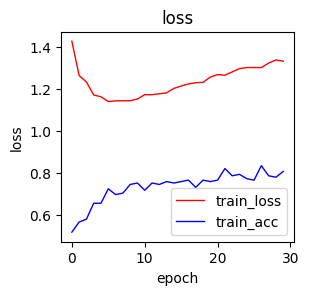

In [44]:
# 优化器

optimizer = torch.optim.SGD(net.parameters(), lr = 0.05)   # 在其他条件不变的情况下，学习率越高，准确率不稳定

# 训练数据
x = []
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

for epoch in range(30):   # 训练所有数据，整套数据 100 次out_list = []
    loss_list = []
    n = 0
    
    for step, (batch_x, batch_y) in enumerate(train_loader):  # 每一步 loader 释放一小批数据用来学习
        # 假设这里就是你训练的地方...
        
        out = net(batch_x) # input x and predict based on x
#         print(out.data)
        L_regularization = 0
        for netpara in net.parameters():
            L_regularization += L_half(netpara.data, 0.08)    # a越大，学习率越大，越不稳定
        loss = criterion(out, batch_y) + 0.02 * L_regularization  # 加入正则项之后的误差函数
    
        
        if out >= 0.5:
            out = torch.tensor(1.0)
        else:
            out = torch.tensor(0.0) 
            
        if out == batch_y:  # 判断输出是否正确
            n += 1
        
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        
        loss_list.append(loss.item())   # 计算每个epoch的平均损失，并记录 
#     if epoch % 5 == 0:
    print("epoch:", epoch, 'loss：',loss, 'acc:', round(n / len(train_loader), 4))
        
    train_acc_list.append(round(n / len(train_loader), 4))
    x.append(epoch)
    train_loss_list.append(np.sum(loss_list)/len(train_loader))
                    
plt.figure(figsize=(3, 6), dpi=100)
    # 创建两行一列的图，并指定当前使用第一个图
plt.subplot(2, 1, 1)
try:
    train_loss_lines.remove(train_loss_lines[0])  # 移除上一步曲线
    val_loss_lines.remove(val_loss_lines[0])
except Exception:
    pass

train_loss_lines = plt.plot(x, train_loss_list, 'r', lw=1)  # lw为曲线宽度
train_acc_lines = plt.plot(x, train_acc_list, 'b', lw=1)
plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train_loss",'train_acc'])
        
# print('均损失：', loss_list)
# print('准确率：', train_acc)

In [97]:
torch.round(torch.tensor([0.1545222221101]))



tensor([0.])

## 测试

In [45]:
n = 0
val_loss_list = []
val_acc_list = []
for step, (X, y) in enumerate(test_loader):

        # 进行预测，也就是做了一次前向传播
        y_pred = net(X)

        # 计算准确率
        if y_pred >= 0.5:
            y_pred = torch.tensor(1.0)
        else:
            y_pred = torch.tensor(0.0) 
            
        if y_pred == y:  # 判断输出是否正确
            n += 1
  
print('acc:', round(n / len(test_loader), 4))
            

acc: 0.8095


In [ ]:
print("accuracy =", float((out.data.numpy() == batch_y.data.numpy()).astype(int).sum()) / float(batch_y.data.numpy().size))
    if step % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = out
        pred_y = prediction.data.numpy()
        target_y = batch_y.data.numpy()
        plt.scatter(batch_x.data.numpy()[:, 0], batch_x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

## 可视化

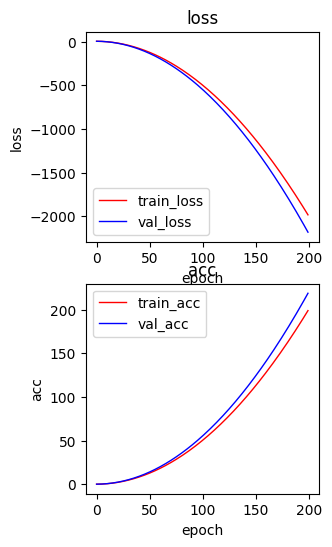

In [36]:
import matplotlib.pyplot as plt

if __name__ == '__main__':
    train_loss = 5
    val_loss = 5
    train_acc = 0.0
    val_acc = 0.0

    x = []
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []

    for epoch in range(200):

        # 生成数据，此处应根据实际训练过程获取训练集loss和acc
        # 以及验证集loss和acc
        train_loss -= epoch * 0.1
        val_loss -= epoch * 0.11

        train_acc += epoch*0.01
        val_acc += epoch*0.011

        x.append(epoch)
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

    plt.figure(figsize=(3, 6), dpi=100)
    # 创建两行一列的图，并指定当前使用第一个图
    plt.subplot(2, 1, 1)
    try:
        train_loss_lines.remove(train_loss_lines[0])  # 移除上一步曲线
        val_loss_lines.remove(val_loss_lines[0])
    except Exception:
        pass

    train_loss_lines = plt.plot(x, train_loss_list, 'r', lw=1)  # lw为曲线宽度
    val_loss_lines = plt.plot(x, val_loss_list, 'b', lw=1)
    plt.title("loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(["train_loss",
                "val_loss"])

    # # 创建两行一列的图，并指定当前使用第二个图
    plt.subplot(2, 1, 2)
    try:
        train_acc_lines.remove(train_acc_lines[0])  # 移除上一步曲线
        val_acc_lines.remove(val_acc_lines[0])
    except Exception:
        pass

    train_acc_lines = plt.plot(x, train_acc_list, 'r', lw=1)  # lw为曲线宽度
    val_acc_lines = plt.plot(x, val_acc_list, 'b', lw=1)
    plt.title("acc")
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.legend(["train_acc",
                "val_acc"])

    plt.show()
    plt.pause(0.1)  # 图片停留0.1s


In [37]:
print("accuracy =", float((out.data.numpy() == batch_y.data.numpy()).astype(int).sum()) / float(batch_y.data.numpy().size))
    if step % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = out
        pred_y = prediction.data.numpy()
        target_y = batch_y.data.numpy()
        plt.scatter(batch_x.data.numpy()[:, 0], batch_x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

IndentationError: unexpected indent (3232708856.py, line 2)

In [14]:
l = np.arange(5)
l

array([0, 1, 2, 3, 4])

In [15]:
li = []
li.append(l)
li

[array([0, 1, 2, 3, 4])]